In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#1 DATA EXPLORATION

#Identifying the Data Domain


'''
Context
A smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, 
typically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary.

--> Types of Smoke Detectors

- Photoelectric Smoke Detector
A photoelectric smoke detector contains a source of infrared, visible, or ultraviolet light, a lens, and a photoelectric receiver. 
In some types, the light emitted by the light source passes through the air being tested and reaches the photosensor. 
The received light intensity will be reduced due to scattering from particles of smoke, air-borne dust, or other substances; 
the circuitry detects the light intensity and generates an alarm if it is below a specified threshold, potentially due to smoke. Such detectors are also known as optical detectors.

- Ionization Smoke Detector
An ionization smoke detector uses a radioisotope to ionize air. If any smoke particles enter the open chamber, some of the ions 
will attach to the particles and not be available to carry the current in that chamber. An electronic circuit detects that a current 
difference has developed between the open and sealed chambers, and sounds the alarm


Columns descriptions:

Index


UTC
Timestamp UTC seconds


Temperature[C]
Air Temperature


Humidity[%]
Air Humidity


TVOC[ppb]
otal Volatile Organic Compounds; measured in parts per billion


eCO2[ppm]
co2 equivalent concentration; calculated from different values like TVCO


Raw H2
raw molecular hydrogen; not compensated (Bias, temperature, etc.)


Raw Ethanol
raw ethanol gas


Pressure[hPa]
Air Pressure


PM1.0
particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)


PM2.5
particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)


NC0.5
Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. 
The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);


NC1.0
Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. 
The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);


NC2.5
Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. 
The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);


CNT
Sample counter



'''

'\nContext\nA smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, \ntypically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary.\n\n--> Types of Smoke Detectors\n\n- Photoelectric Smoke Detector\nA photoelectric smoke detector contains a source of infrared, visible, or ultraviolet light, a lens, and a photoelectric receiver. \nIn some types, the light emitted by the light source passes through the air being tested and reaches the photosensor. \nThe received light intensity will be reduced due to scattering from particles of smoke, air-borne dust, or other substances; \nthe circuitry detects the light intensity and generates an alarm if it is below a specified threshold, potentially due to smoke. Such detectors are also known as optical detectors.\n\n- Ionization Smoke Detector\nAn ionization smoke detector uses a radioisotope to ioniz

In [3]:
#1.1 Data Collection

df = pd.read_csv('C:\\Users\\Chatha\\Desktop\\smoke_detection_iot.csv\\smoke_detection_iot.csv')

df= df.drop(columns='Fire Alarm')
df= df.drop(columns='CNT')

df.head(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00
5,5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00
6,6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00
7,7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00
8,8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00
9,9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78


In [4]:
#1.2 Data Cleaning

# Check for missing values
print(df.isnull().sum())




Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
dtype: int64


Numerical Summary for column Unnamed: 0:
Mean: 31314.50
Median: 31314.50
Standard Deviation: 18079.87
Min: 0.00, Max: 62629.00
Range: 62629.00
Quantiles: 25th percentile = 15657.25, 50th percentile = 31314.50, 75th percentile = 46971.75
--------------------------------------------------


TypeError: Axes.boxplot() got an unexpected keyword argument 'linecolor'

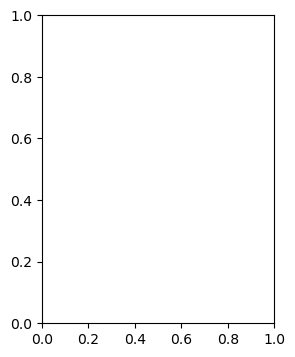

In [5]:

#1.3 Data Visualization & Statistical mesures

#1.3.1 Boxplot & Statistical mesures

'''

What Each Part of the Boxplot Represents:
Box (interquartile range - IQR):

The box represents the middle 50% of the data.
The bottom of the box is the 1st quartile (Q1) — 25% of the data is below this value.
The top of the box is the 3rd quartile (Q3) — 75% of the data is below this value.
The height of the box is the IQR = Q3 - Q1.
Line inside the box (Median):

This is the median (Q2) — 50% of the data is below this value.
It's a measure of the center of the distribution.
Whiskers:

The lines extending from the box are the whiskers.
They typically show the range of data within 1.5 times the IQR from Q1 and Q3.
Any data point outside this range is considered an outlier.
Outliers (dots):

Values that are far away from the majority of the data are shown as dots outside the whiskers.

'''

for column in df.columns:
    if column=="Index":continue
    


    # Compute the summary statistics
    mean = df[column].mean()
    median = df[column].median()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    range_val = max_val - min_val
    quantiles = df[column].quantile([0.25, 0.5, 0.75])

    # Print the numerical summary for the current column
    print(f"Numerical Summary for column {column}:")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Min: {min_val:.2f}, Max: {max_val:.2f}")
    print(f"Range: {range_val:.2f}")
    print(f"Quantiles: 25th percentile = {quantiles[0.25]:.2f}, 50th percentile = {quantiles[0.5]:.2f}, 75th percentile = {quantiles[0.75]:.2f}")
    print('-' * 50)


    plt.figure(figsize=(3, 4))
    sns.boxplot(y=df[column], color='skyblue',linecolor='red')

    # Set title and labels
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
    plt.xticks(fontsize=12)  # Change font size for the x-axis
    plt.yticks(fontsize=12)  # Change font size for the y-axis
    # Display the plot
    plt.show()




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# UTC = Timestamp
plt.figure(figsize=(6, 3))

for column in df.columns:
    if (column in ['UTC','Index']): continue
    # Create a line plot for column against UTC
    sns.lineplot(data=df, x='UTC', y=column, marker='o')

    # Set plot title and labels
    plt.title('Evolution of {} over UTC'.format(column), fontsize=16)
    plt.xlabel('UTC', fontsize=14)
    plt.ylabel(column, fontsize=14)

    # Customize the tick labels for better readability if needed
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis ticks if the UTC values are large or close together
    plt.yticks(fontsize=12)

    # Display the plot
    plt.tight_layout()  # Ensures that labels do not overlap
    plt.show()


Median value for column Unnamed: 0 = 31314.5 

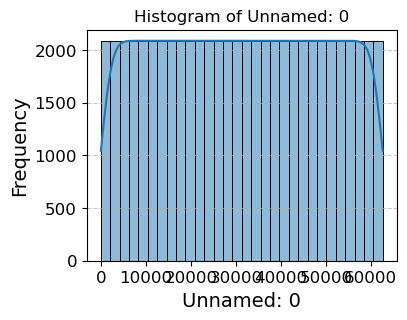

Median value for column UTC = 1654761919.5 

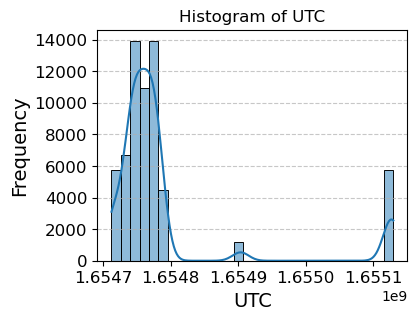

Median value for column Temperature[C] = 20.13 

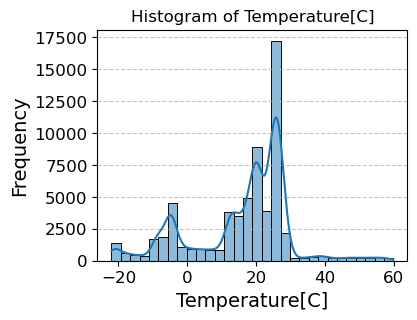

Median value for column Humidity[%] = 50.15 

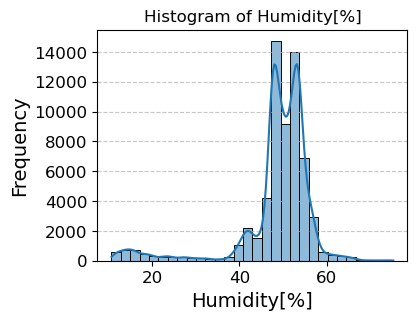

Median value for column TVOC[ppb] = 981.0 

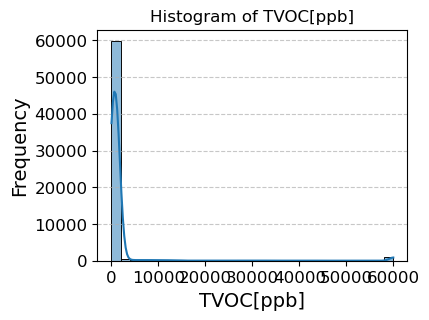

Median value for column eCO2[ppm] = 400.0 

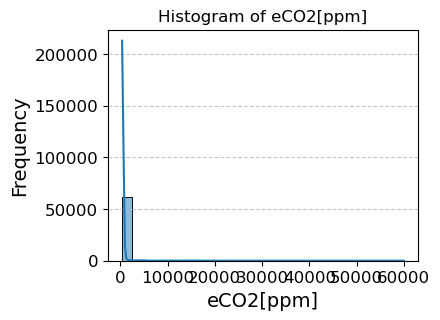

Median value for column Raw H2 = 12924.0 

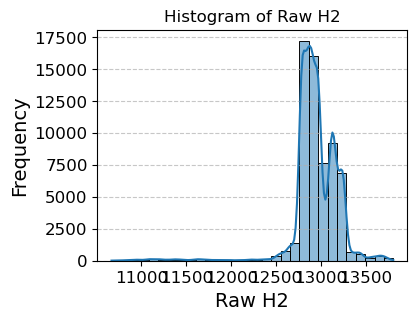

Median value for column Raw Ethanol = 19501.0 

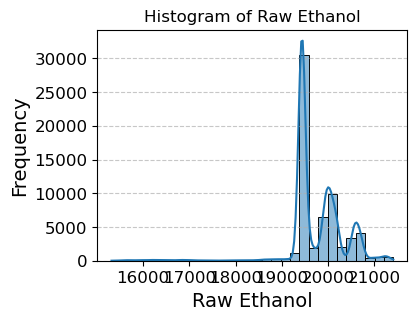

Median value for column Pressure[hPa] = 938.816 

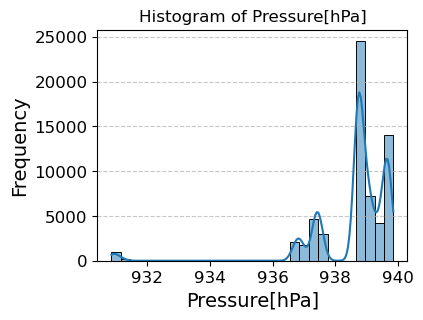

Median value for column PM1.0 = 1.81 

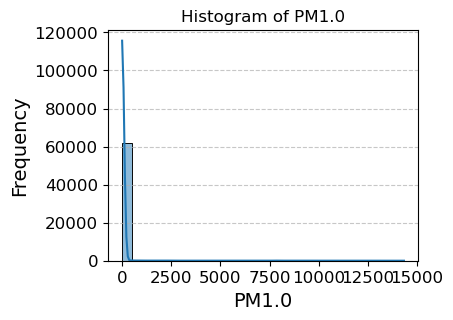

Median value for column PM2.5 = 1.88 

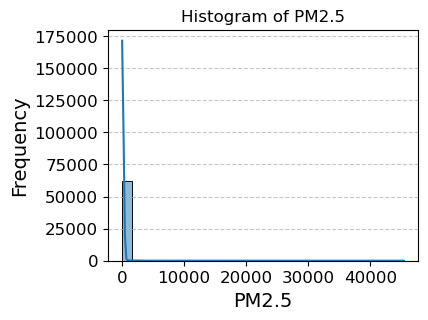

Median value for column NC0.5 = 12.45 

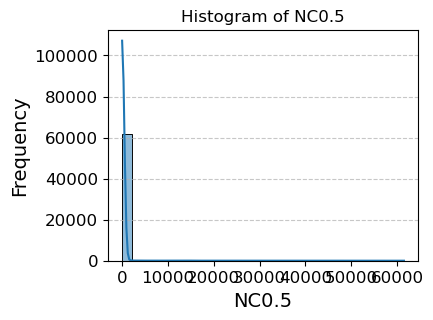

Median value for column NC1.0 = 1.943 

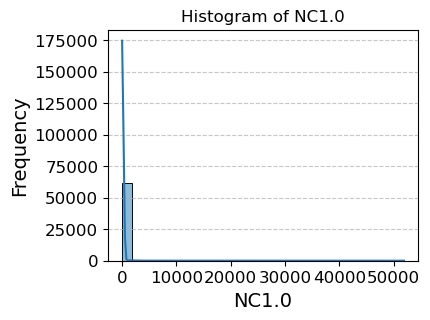

Median value for column NC2.5 = 0.044 

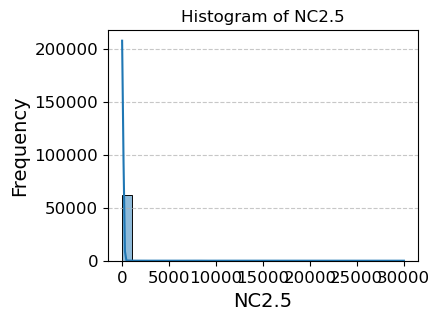

In [6]:
#1.3.2 Histogram

for column in df.columns:
    if column == "Index": continue
    
    plt.figure(figsize=(4, 3))  # Adjust the size for histograms
    sns.histplot(df[column], kde=True, bins=30)  # Histogram with KDE (Kernel Density Estimation)

    # Set title and labels
    plt.title(f'Histogram of {column}')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
    plt.xticks(fontsize=12)  # Change font size for the x-axis
    plt.yticks(fontsize=12)  # Change font size for the y-axis
    print(f"Median value for column {column} = {df[column].median()}", end=' ')
    # Display the plot
    plt.show()


In [7]:

#1.3.3 Correlation matrix analysis
plt.figure(figsize=(10,10))
correlation_matrix = df_normalized.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 10})
plt.xticks(fontsize=12)  # Font size for x-axis labels
plt.yticks(fontsize=12)  # Font size for y-axis labels
plt.show()

NameError: name 'df_normalized' is not defined

<Figure size 1000x1000 with 0 Axes>

In [10]:
#1.4 Data Transformation

from sklearn.preprocessing import StandardScaler

# Normalization
scaler = StandardScaler()

df_normalized= df.copy()

for column in df.columns:
    if (column in ['Index','CNT']): continue
    df_normalized[column] = scaler.fit_transform(df[[column]])

df_normalized.head(10)


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,-1.732023,-0.533948,0.280622,0.994947,-0.248614,-0.141679,-2.335935,-2.025006,0.831761,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
1,-1.731968,-0.533939,0.281666,0.917115,-0.248614,-0.141679,-2.192796,-1.810079,0.838521,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
2,-1.731913,-0.533930,0.282641,0.837028,-0.248614,-0.141679,-2.086359,-1.624683,0.834014,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
3,-1.731857,-0.533921,0.283686,0.760324,-0.248614,-0.141679,-2.027636,-1.485227,0.832512,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
4,-1.731802,-0.533912,0.284730,0.693773,-0.248614,-0.141679,-1.979923,-1.367099,0.838521,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
5,-1.731747,-0.533903,0.285705,0.629477,-0.248614,-0.141679,-1.921199,-1.240767,0.824250,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
6,-1.731691,-0.533894,0.286750,0.571949,-0.248614,-0.141679,-1.873486,-1.142327,0.834014,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
7,-1.731636,-0.533885,0.287795,0.525702,-0.248614,-0.141679,-1.847794,-1.050450,0.849037,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
8,-1.731581,-0.533876,0.288770,0.481710,-0.248614,-0.141679,-1.814762,-0.983183,0.849037,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
9,-1.731525,-0.533867,0.289814,0.442230,-0.248614,-0.141679,-1.796411,-0.917556,0.847534,-0.108068,-0.091428,-0.115215,-0.089952,-0.071323



<div>
<img src="image.png" width="600"/>
</div>

In [11]:
from sklearn.decomposition import PCA

In [12]:
print(df_normalized.columns)


Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5'],
      dtype='object')


In [13]:
# Appliquer l'ACP
pca = PCA(n_components=2)  # Choisir le nombre de composantes principales (ici 2)

In [14]:
# Supprimer les colonnes non numériques ou non pertinentes (comme 'Unnamed: 0' et 'UTC')
df_pca = pca.fit_transform(df_normalized.drop(columns=['Unnamed: 0', 'UTC']))

In [15]:

# Afficher les premières lignes du DataFrame après transformation
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
print(df_pca_df.head(10))

        PC1       PC2
0  0.580507  0.371626
1  0.500161  0.360411
2  0.439056  0.334954
3  0.401235  0.303023
4  0.368939  0.278154
5  0.334254  0.246991
6  0.304770  0.229000
7  0.280456  0.215325
8  0.261894  0.197178
9  0.249907  0.179584


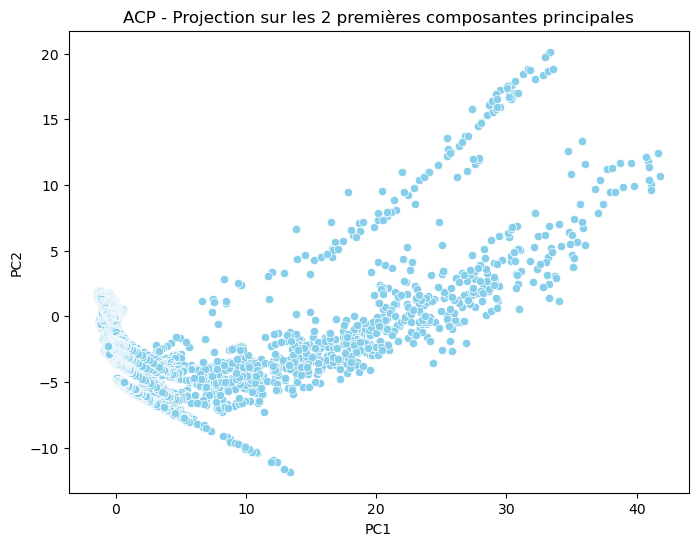

In [16]:
# Visualiser les résultats de l'ACP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_df, color='skyblue')
# Ajouter des titres et des labels
plt.title('ACP - Projection sur les 2 premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [17]:
# Afficher la variance expliquée par chaque composante principale
print(f"Variance expliquée par chaque composante principale: {pca.explained_variance_ratio_}")
print(f"Variance totale expliquée: {sum(pca.explained_variance_ratio_)}")

Variance expliquée par chaque composante principale: [0.52600655 0.15294752]
Variance totale expliquée: 0.6789540749920979


In [18]:
from sklearn.cluster import KMeans

In [19]:
# Appliquer K-Means avec n_init explicitement défini
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_pca_df['KMeans_Cluster'] = kmeans.fit_predict(df_pca_df[['PC1', 'PC2']])

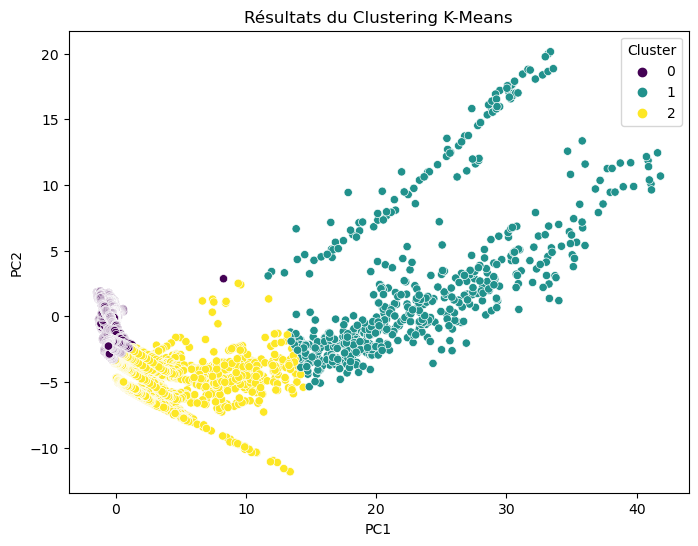

In [20]:
# Visualiser les résultats du clustering K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='KMeans_Cluster', 
    data=df_pca_df, 
    palette='viridis', 
    legend='full'
)
plt.title('Résultats du Clustering K-Means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

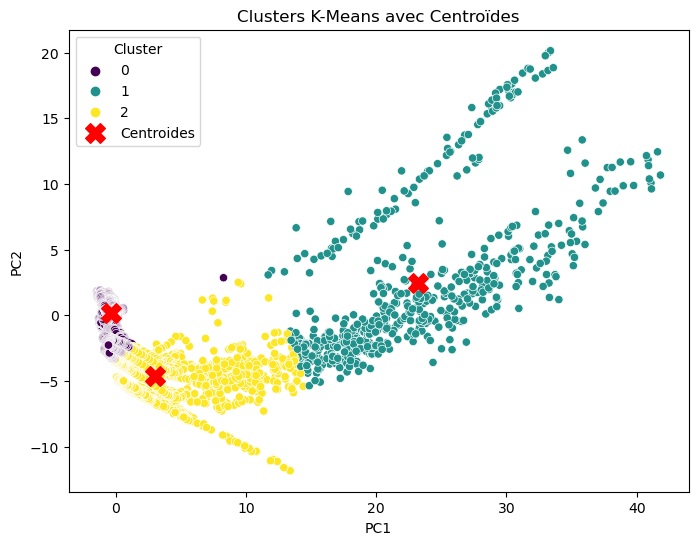

In [21]:
# Récupérer les centroïdes des clusters
centroids = kmeans.cluster_centers_

# Ajouter les centroïdes au graphique
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='KMeans_Cluster', 
    data=df_pca_df, 
    palette='viridis', 
    legend='full'
)
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    s=200, c='red', marker='X', 
    label='Centroides'
)
plt.title('Clusters K-Means avec Centroïdes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

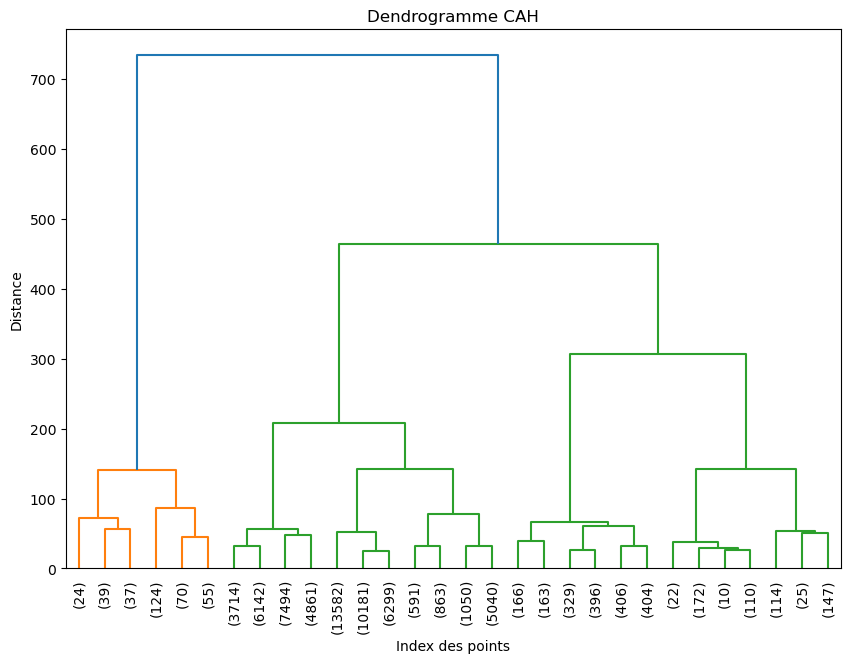

In [23]:
# Calculer la matrice de linkage
Z = linkage(df_pca_df[['PC1', 'PC2']], method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogramme CAH")
plt.xlabel("Index des points")
plt.ylabel("Distance")
plt.show()
